In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import shuffle

c:\Users\smart\Anaconda3\envs\workspace\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\smart\Anaconda3\envs\workspace\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\smart\Anaconda3\envs\workspace\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [5]:
data = pd.read_excel('titanic3.xls')

In [6]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [11]:
print(data["embarked"].drop_duplicates())
print(data["cabin"].drop_duplicates())

0        S
9        C
168    NaN
206      Q
Name: embarked, dtype: object
0            B5
1       C22 C26
5           E12
6            D7
7           A36
         ...   
1025       E121
1122      F E69
1131        E10
1187         G6
1249        F38
Name: cabin, Length: 187, dtype: object


In [12]:
df = data.copy()
df["sex"] =  df["sex"].apply(lambda x : 1 if x == "male" else 0)
df["sex"]

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int64

In [13]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
df["age"] = df["age"].fillna(np.mean(df["age"]))
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [15]:
df["embarked"] = data.copy()["embarked"]
df["embarked"].fillna("S", inplace = True)

def replace_embarked(x):
  if x == "S":
    return 0
  elif x == "C":
    return 1
  elif x == "Q":
    return 2
df["embarked"]  = df["embarked"].apply(replace_embarked)
print(df["embarked"].head())

0    0
1    0
2    0
3    0
4    0
Name: embarked, dtype: int64


In [16]:
df["cabin"] = data.copy()["cabin"]
df["cabin"].fillna("G6",  inplace= True)

set_val = set()
for i in df.index:
  set_val.add(df["cabin"][i][0])
set_val = sorted(set_val)
ind_lst = list(range(len(set_val)))
dic_cabin = {set_val[i]: ind_lst[i] for i in range(len(set_val))}
print(dic_cabin)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}


In [17]:
def replace_cabin(x):
  return dic_cabin[x[0]]
df["cabin"] = df["cabin"].apply(replace_cabin)
print(df["cabin"].head())

0    1
1    2
2    2
3    2
4    2
Name: cabin, dtype: int64


In [19]:
dff = df[df["pclass"] == 3]
df["fare"] = df["fare"].fillna(np.mean(dff["fare"]))
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [20]:
df = df.drop(["boat", "body" , "home.dest"] , axis = 1)
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 219 to 458
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   int64  
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   cabin     1309 non-null   int64  
 10  embarked  1309 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 122.7+ KB


In [24]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
219,1,1,"Omont, Mr. Alfred Fernand",1,29.881135,0,0,F.C. 12998,25.7417,6,1
1069,3,0,"O'Brien, Mr. Thomas",1,29.881135,1,0,370365,15.5000,6,2
101,1,0,"Dulles, Mr. William Crothers",1,39.000000,0,0,PC 17580,29.7000,0,1
813,3,0,"Franklin, Mr. Charles (Charles Fardon)",1,29.881135,0,0,SOTON/O.Q. 3101314,7.2500,6,0
287,1,0,"Sutton, Mr. Frederick",1,61.000000,0,0,36963,32.3208,3,0
367,2,0,"Chapman, Mr. Charles Henry",1,52.000000,0,0,248731,13.5000,6,0
52,1,0,"Carrau, Mr. Francisco M",1,28.000000,0,0,113059,47.1000,6,0
1260,3,1,"Turja, Miss. Anna Sofia",0,18.000000,0,0,4138,9.8417,6,0
378,2,0,"Collyer, Mr. Harvey",1,31.000000,1,1,C.A. 31921,26.2500,6,0
520,2,1,"Nourney, Mr. Alfred (""Baron von Drachstedt"")",1,20.000000,0,0,SC/PARIS 2166,13.8625,3,1


In [44]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

df["name"] = labelencoder_X.fit_transform(df["name"])
df["embarked"] = labelencoder_X.fit_transform(df["embarked"])
df["ticket"] = df["ticket"].astype(str)
df["ticket"] = labelencoder_X.fit_transform(df["ticket"])

In [46]:
from sklearn.preprocessing import OneHotEncoder

result = OneHotEncoder().fit_transform(df["sex"].values.reshape(-1, 1)).toarray()
df[["Female", "Male"]] = pd.DataFrame(result, index = df.index)
df.drop(["sex"], axis=1, inplace=True)

In [48]:
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,Female,Male
832,3,0,462,43.000000,1,6,775,46.9000,6,0,1.0,0.0
848,3,0,489,41.000000,2,0,546,14.1083,6,0,0.0,1.0
1005,3,0,775,29.881135,0,0,606,15.5000,6,2,0.0,1.0
955,3,0,688,29.881135,3,1,671,25.4667,6,0,1.0,0.0
1195,3,0,1080,29.881135,0,0,640,7.7500,6,2,0.0,1.0


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
p_predict = model.predict(X_test)

print("The accuracy is", round(accuracy_score(p_predict, y_test) * 100,2))

The accuracy is 79.9


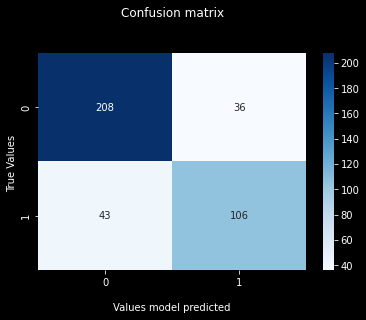

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       244
           1       0.75      0.71      0.73       149

    accuracy                           0.80       393
   macro avg       0.79      0.78      0.78       393
weighted avg       0.80      0.80      0.80       393



In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

plt.style.use('dark_background')

confusionMatrix = pd.crosstab(y_test, p_predict)
classificationReport = classification_report(y_test, p_predict)


fx = sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nValues model predicted")
fx.set_ylabel("True Values ")
plt.show()
print(f"Classification Report\n{classificationReport}")

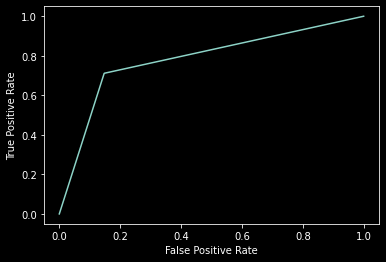

In [52]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, p_predict)

plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()